<a href="https://colab.research.google.com/github/hannahrjiang/school-stuff/blob/master/traffic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Visualization

**Central question:** Are different types of weather more/less dangerous to drive in?

We're defining "dangerous" as being injured/killed in a car collision.

In [0]:
#importing libraries
import numpy as np
from datascience import *
from matplotlib import pyplot as plt

To answer this question, we found data on all Seattle collisions that occured in 2019. The table (imported below) told us the number of injuries, serious injuries, and fatalities sustained depending on different weather conditions.


*   Injury - temporary injury, like a broken bone, headache, concussion, trauma, etc.
*   Serious Injury - permanent affliction, like dismemberment, blinding, paralysis, etc.
*   Fatality - Death





In [0]:
#importing data from https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ahhhhh - Sheet1.csv to ahhhhh - Sheet1.csv
User uploaded file "ahhhhh - Sheet1.csv" with length 190516 bytes


In [0]:
collision_data = Table().read_table("ahhhhh - Sheet1.csv")
road_cond = collision_data.where("ROADCOND", are.not_equal_to("nan")).where("WEATHER", are.not_equal_to ("Unknown"))
final_data = Table().with_columns("INJURIES", road_cond.column("INJURIES"),"SERIOUSINJURIES", road_cond.column("SERIOUSINJURIES"),"FATALITIES", road_cond.column("FATALITIES"),"WEATHER", road_cond.column("WEATHER"),"ROADCOND", road_cond.column("ROADCOND"),"LIGHTCOND", road_cond.column("LIGHTCOND"))
final_data

INJURIES,SERIOUSINJURIES,FATALITIES,WEATHER,ROADCOND,LIGHTCOND
1,0,0,Clear or Partly Cloudy,Dry,Dark - Street Lights On
0,0,0,Clear or Partly Cloudy,Dry,Daylight
1,0,0,Clear or Partly Cloudy,Dry,Daylight
1,0,0,Clear or Partly Cloudy,Dry,Daylight
1,0,0,Raining,Wet,Dark - Street Lights On
0,0,0,Clear or Partly Cloudy,Dry,Daylight
0,0,0,Clear or Partly Cloudy,Dry,Daylight
3,0,0,Clear or Partly Cloudy,Dry,Daylight
1,0,0,Clear or Partly Cloudy,Dry,Daylight
0,0,0,Clear or Partly Cloudy,Wet,Dark - Street Lights On


The following code determined the number of injuries, serious injuries, or fatalities that resulted in 100 collisions. For example, if it snows, 18 in 100 collisions will result in a fatality. 54 out of 100 collisions will result in an injury, and 36 out of 100 collisions will result in a serious injury.

In [0]:
def table_weather(type_weather):
  sort_table = final_data.where("WEATHER", are.equal_to(type_weather))
  injuries_sum = np.sum(sort_table.column("INJURIES"))
  sinjuries_sum = np.sum(sort_table.column("SERIOUSINJURIES"))
  fatal_sum = np.sum(sort_table.column("FATALITIES"))
  return(Table().with_columns("Collision type", make_array("INJURIES", "SERIOUSINJURIES", "FATALITIES"), "Percent of Injuries", make_array((100*injuries_sum / sort_table.num_rows), (100*sinjuries_sum / sort_table.num_rows), (100*fatal_sum / sort_table.num_rows))))
table_weather("Clear or Partly Cloudy")
table = table_weather("Snowing").join("Collision type", table_weather("Raining")).join("Collision type", table_weather("Overcast")).join("Collision type", table_weather("Clear or Partly Cloudy"))
graph_table = table.relabel("Percent of Injuries", "Snowing").relabel("Percent of Injuries_2", "Raining").relabel("Percent of Injuries_3", "Overcast").relabel("Percent of Injuries_4", "Clear or Partly Cloudy")
graph_table

Collision type,Snowing,Raining,Overcast,Clear or Partly Cloudy
FATALITIES,18.1818,8.10811,1.69492,1.60643
INJURIES,54.5455,36.4865,30.5085,46.1847
SERIOUSINJURIES,36.3636,9.45946,6.77966,2.00803


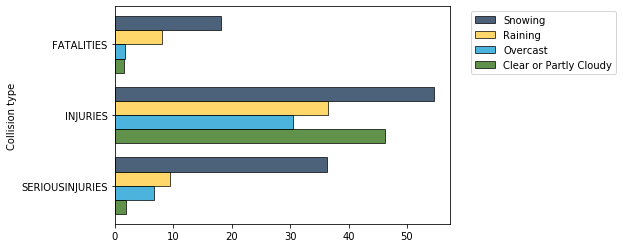

In [0]:
%matplotlib inline
graph_table.barh("Collision type")

We can tell from the bar graph above that driving in the snow has the highest rate of injury, serious injury, and fatalities per collision than any other weather, closely followed by rain. 

But to determine just how "dangerous" each weather condition is, we should add up the rates to know the total injury rate for each type of weather.

In [0]:
total_table = Table().with_columns("Weather", make_array("Snowing", "Raining", "Overcast", "Clear or Partly Cloudy"), "Injury per 100 Collisions", make_array(np.sum(graph_table.column("Snowing")), np.sum(graph_table.column("Raining")), np.sum(graph_table.column("Overcast")), np.sum(graph_table.column("Clear or Partly Cloudy"))))
#total_table.barh("Weather")
total_table

Weather,Injury per 100 Collisions
Snowing,109.091
Raining,54.0541
Overcast,38.9831
Clear or Partly Cloudy,49.7992


Snowing has an injury rate of around 109 injuries per 100 collisions. This means that one collision would (on average) cause more than one injury - so it'd affect multiple people involved in the collision. Next up is rain, which is around 54 injuries per 100 collisions, clear weather- 50 injuries per 100 collisions, and overcast- around 39 injuries per 100 collisions.

While we oculd come to the conclusion that snowing is the most "dangerous" because of its high injury rate, it only makes up a small fraction of Seattle's daily weather. 

In [0]:
weather_array = final_data.column("WEATHER")
weather_num = make_array((100*np.count_nonzero(weather_array == "Clear or Partly Cloudy")/392),(100*np.count_nonzero(weather_array == "Overcast")/392),(100*np.count_nonzero(weather_array == "Snowing")/392),(100*np.count_nonzero(weather_array == "Raining")/392))
weather_table = Table().with_columns("Weather", make_array("Clear or Partly Cloudy", "Overcast", "Snowing", "Raining"), "Percentage", weather_num)
weather_table


Weather,Percentage
Clear or Partly Cloudy,63.5204
Overcast,15.051
Snowing,2.80612
Raining,18.8776


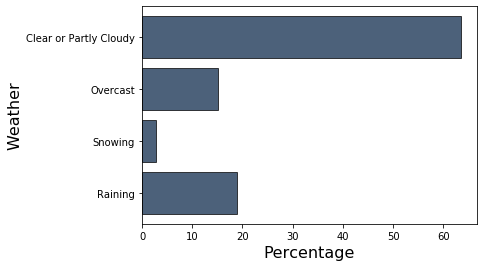

In [0]:
#Bar time
%matplotlib inline
weather_table.barh ("Weather", "Percentage")

The table and bar chart above show that collisions that occur in the snow make up a really small percentage of the yearly weather- only around 11 out of 395 reported collisions. Though it has a high injury rate, collisions that occur in the snow are extrememly rare.